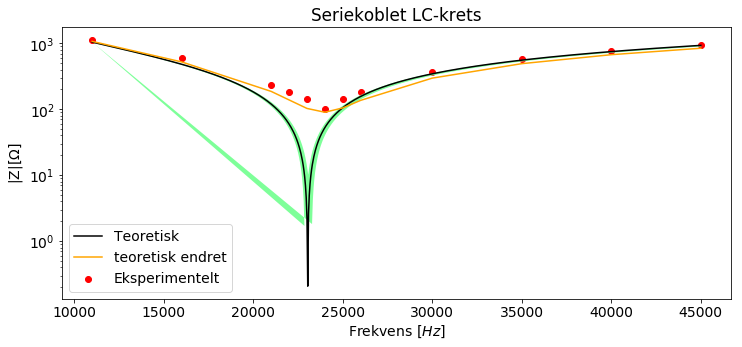

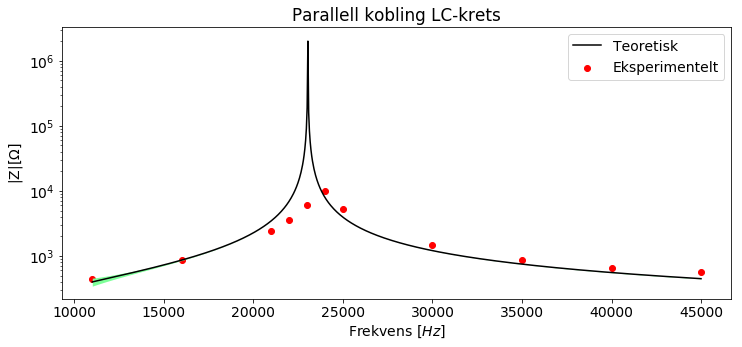

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font',**font)

#para
vpp1 = np.array([4.2,6.6,9.4,9.6,9.8,10.0,9.8,8.4,6.8,5.6,5.0])
vpp2 = np.array([9.2,7.6,3.8,2.6,1.6,1.0,1.8,5.6,7.6,8.4,8.8])
frekvens = np.array([11,16,21,22,23,24,25,30,35,40,45])*10**(3)
#Serie
vpp12 = np.array([7.8,5.2,2.2,1.8,1.4,1.0,1.4,1.8,3.4,5.0,6.2,7.0])
vpp22 = np.array([6.8,8.6,9.4,9.6,9.6,9.6,9.6,9.6,9.2,8.6,8.0,7.2])
frekvens2 = np.array([11,16,21,22,23,24,25,26,30,35,40,45])*10**(3)

R = 983
Z = (vpp1/vpp2)*R
Z1 = (vpp12/vpp22)*R


L = 4.46*10**(-3)
Lny = 4.13*10**(-3)
C = 10.70*10**(-9)
contfrq = np.linspace(11*10**(3),45*10**(3),800)
X_c = 1/(2*np.pi*C*contfrq)
X_l = (2*np.pi*L*contfrq)
Ri = 90

##plot teoretisk
#med motstand
Zserielny = np.sqrt((Ri**2+(2*np.pi*frekvens2*Lny-(1/(2*np.pi*frekvens2*C)))**2))
Zparalellm = (1/np.sqrt(((1/(Ri**2+((2*np.pi*frekvens*L)-(2*np.pi*frekvens*C))**2)))))

#Uten motstand
Zserie = np.sqrt(((2*np.pi*contfrq*L-(1/(2*np.pi*contfrq*C)))**2))
Zparalell = (1/np.sqrt(((1/(2*np.pi*contfrq*L))-(2*np.pi*contfrq*C))**2))

#Usikkerhet parallell

def usikkerhetparallell(f,L,C,dC,dL):

    w = 2*f*np.pi
    forste = ((w*(1/(L*w) - C*w))/(np.sqrt(((L/w - C*w)**2)**3)))*dC
    andre = (L*w**2*np.sqrt((C*L*w**2-1)**2)/((L**2*w**2))/(C*L*w**2-1)**3)*dL
    resultat = abs(forste) + abs(andre)
    return resultat


# print(usikkerhetparallell(frekvens,L,C,0.02*10**(-9),0.06*10**(-3)))


# plt.yscale("log")
# plt.plot(frekvens,Z,label='Eksperimentelt parallell')
# plt.plot(frekvens,Zparalell,label='Teoretisk parallell')
# plt.plot(frekvens2,Z1,label='Eksperimentelt serie')
# plt.plot(frekvens2,Zserie,label='Teoretisk serie')
# plt.legend(loc='upper right')
# plt.legend()
# plt.show()

from matplotlib import pyplot as pl
import numpy as np


# ub0 = Z1 + (5/983)*Z1
# lb0 = Z1 - (5/983)*Z1
#
# ub1 = Zserie + 2*np.pi*frekvens2*(0.07*10**(-3)+0.003*10**(-6))
# lb1 = Zserie - 2*np.pi*frekvens2*(0.07*10**(-3)+0.003*10**(-6))

plt.figure(figsize=(12,5))
plt.yscale("log")
x = frekvens2
y = Z1
error = (12/983)*Z1
pl.scatter(x, y, color='red',label="Eksperimentelt")
# pl.fill_between(x, y-error, y+error,
#     alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')

x = contfrq
y = Zserie
error = 2*np.pi*contfrq*(0.07*10**(-3)+0.13*10**(-9))
pl.plot(x, y, 'k', color='black',label="Teoretisk")
pl.fill_between(x, y-error, y+error,
    alpha=1, edgecolor='#3F7F4C', facecolor='#7EFF99',
    linewidth=0)

# pl.plot(contfrq, X_c, 'k', color='orange',label="reaktans kondensator")
# pl.plot(contfrq, X_l, 'k', color='yellow',label="reaktans spole")
pl.plot(frekvens2, Zserielny, 'k', color='orange',label="teoretisk endret")


plt.title("Seriekoblet LC-krets")
plt.ylabel("|Z|$[\Omega]$")
plt.xlabel("Frekvens $[Hz]$")
plt.legend(loc='upper right')
plt.legend()
plt.show()


plt.figure(figsize=(12,5))
plt.yscale("log")
x = frekvens
y = Z
error = (12/983)*Z
pl.scatter(x, y, color='red',label="Eksperimentelt")
# pl.fill_between(x, y-error, y+error,
#     alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')

x = contfrq
y = Zparalell
error = usikkerhetparallell(x,L,C,0.13*10**(-9),0.07*10**(-3))
pl.plot(x, y, 'k', color='black',label="Teoretisk")
pl.fill_between(x, y-error, y+error,
    alpha=1, edgecolor='#3F7F4C', facecolor='#7EFF99',
    linewidth=0)




# pl.plot(contfrq, X_c, 'k', color='orange',label="reaktans kondensator")
# pl.plot(contfrq, X_l, 'k', color='yellow',label="reaktans spole")
plt.title("Parallell kobling LC-krets")
plt.ylabel("|Z|$[\Omega]$")
plt.xlabel("Frekvens $[Hz]$")
plt.legend(loc='upper right')
plt.legend()
plt.show()




# x = frekvens
# y = Z
# error = (5/983)*Z
# pl.plot(x, y, 'k', color='orange')
# pl.fill_between(x, y-error, y+error,
#     alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
#
# y = Zparalell
# error = 2*np.pi*frekvens*(0.07*10**(-3)+0.003*10**(-6))
# pl.plot(x, y, 'k', color='green')
# pl.fill_between(x, y-error, y+error,
#     alpha=0.2, edgecolor='#1B2ACC', facecolor='#089FFF',
#     linewidth=4, antialiased=True)
